In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lats = np.random.uniform(-90,90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Creating a lit out of lats and lngs from the zip
coordinates = list(lats_lngs)

In [4]:
from citipy import citipy
from datetime import datetime

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
import requests

from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create empty list for city weather data
city_data = []

# print beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counters
record_count = 1
set_count = 1



Beginning Data Retrieval     
-----------------------------


In [1]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

NameError: name 'cities' is not defined

In [38]:
len(city_data)

557

In [39]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,64.15,75,7,7.00,UY,2021-04-02 22:27:07
1,Yellowknife,62.4560,-114.3525,8.01,78,90,6.91,CA,2021-04-02 22:25:58
2,Bluff,-46.6000,168.3333,50.00,81,92,3.00,NZ,2021-04-02 22:26:02
3,Adrar,20.5022,-10.0711,86.34,6,93,9.86,MR,2021-04-02 22:27:17
4,Barrow,71.2906,-156.7887,-14.80,76,1,4.61,US,2021-04-02 22:26:55
5,Norman Wells,65.2820,-126.8329,8.60,61,75,3.44,CA,2021-04-02 22:26:04
6,Vaini,-21.2000,-175.2000,82.40,78,75,4.61,TO,2021-04-02 22:25:55
7,Jamestown,42.0970,-79.2353,35.01,34,1,14.97,US,2021-04-02 22:26:09
8,Sovetskiy,61.3614,63.5842,23.79,96,17,4.16,RU,2021-04-02 22:30:33
9,Nikolskoye,59.7035,30.7861,35.01,86,0,4.47,RU,2021-04-02 22:26:18


In [40]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2021-04-02 22:27:07,-33.6971,-53.4616,64.15,75,7,7.00
1,Yellowknife,CA,2021-04-02 22:25:58,62.4560,-114.3525,8.01,78,90,6.91
2,Bluff,NZ,2021-04-02 22:26:02,-46.6000,168.3333,50.00,81,92,3.00
3,Adrar,MR,2021-04-02 22:27:17,20.5022,-10.0711,86.34,6,93,9.86
4,Barrow,US,2021-04-02 22:26:55,71.2906,-156.7887,-14.80,76,1,4.61
...,...,...,...,...,...,...,...,...,...
552,Ayagoz,KZ,2021-04-02 22:32:47,47.9714,80.4392,31.51,71,2,7.43
553,Port-Gentil,GA,2021-04-02 22:27:29,-0.7193,8.7815,78.80,94,20,4.61
554,Tonj,SS,2021-04-02 22:32:48,7.2737,28.6822,78.82,36,71,4.00
555,Shache,CN,2021-04-02 22:28:48,38.4167,77.2406,39.67,65,12,3.58


In [41]:
output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

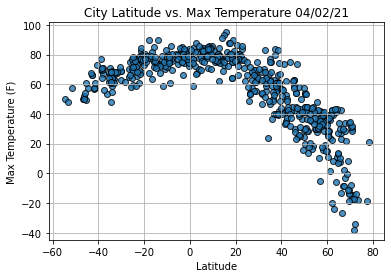

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

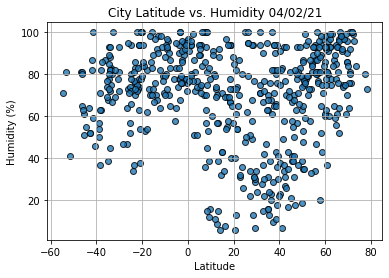

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

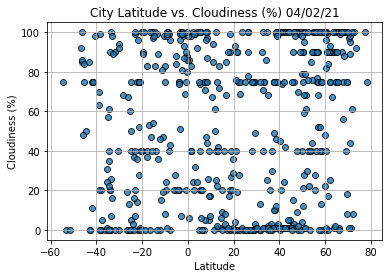

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.

plt.show()

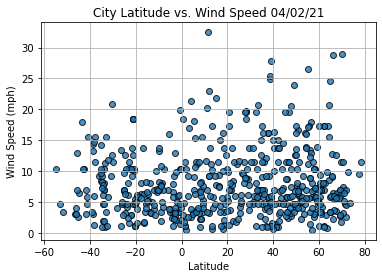

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [47]:
# Import linregress
from scipy.stats import linregress

In [51]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

   
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [52]:
index13 = city_data_df.loc[13]
index13

City                       Atuona
Country                        PF
Date          2021-04-02 22:23:51
Lat                          -9.8
Lng                      -139.033
Max Temp                    80.55
Humidity                       80
Cloudiness                     24
Wind Speed                  13.18
Name: 13, dtype: object

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2021-04-02 22:27:07,-33.6971,-53.4616,64.15,75,7,7.00
1,Yellowknife,CA,2021-04-02 22:25:58,62.4560,-114.3525,8.01,78,90,6.91
2,Bluff,NZ,2021-04-02 22:26:02,-46.6000,168.3333,50.00,81,92,3.00
3,Adrar,MR,2021-04-02 22:27:17,20.5022,-10.0711,86.34,6,93,9.86
4,Barrow,US,2021-04-02 22:26:55,71.2906,-156.7887,-14.80,76,1,4.61
5,Norman Wells,CA,2021-04-02 22:26:04,65.2820,-126.8329,8.60,61,75,3.44
6,Vaini,TO,2021-04-02 22:25:55,-21.2000,-175.2000,82.40,78,75,4.61
7,Jamestown,US,2021-04-02 22:26:09,42.0970,-79.2353,35.01,34,1,14.97
8,Sovetskiy,RU,2021-04-02 22:30:33,61.3614,63.5842,23.79,96,17,4.16
9,Nikolskoye,RU,2021-04-02 22:26:18,59.7035,30.7861,35.01,86,0,4.47


In [56]:
city_data_df["Lat"]>=0

0      False
1       True
2      False
3       True
4       True
       ...  
552     True
553    False
554     True
555     True
556    False
Name: Lat, Length: 557, dtype: bool

In [57]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Yellowknife,CA,2021-04-02 22:25:58,62.4560,-114.3525,8.01,78,90,6.91
3,Adrar,MR,2021-04-02 22:27:17,20.5022,-10.0711,86.34,6,93,9.86
4,Barrow,US,2021-04-02 22:26:55,71.2906,-156.7887,-14.80,76,1,4.61
5,Norman Wells,CA,2021-04-02 22:26:04,65.2820,-126.8329,8.60,61,75,3.44
7,Jamestown,US,2021-04-02 22:26:09,42.0970,-79.2353,35.01,34,1,14.97
...,...,...,...,...,...,...,...,...,...
550,Thinadhoo,MV,2021-04-02 22:32:46,0.5333,72.9333,82.90,77,6,18.48
551,Upata,VE,2021-04-02 22:32:47,8.0086,-62.3989,84.00,63,96,8.01
552,Ayagoz,KZ,2021-04-02 22:32:47,47.9714,80.4392,31.51,71,2,7.43
554,Tonj,SS,2021-04-02 22:32:48,7.2737,28.6822,78.82,36,71,4.00


In [58]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Yellowknife,CA,2021-04-02 22:25:58,62.4560,-114.3525,8.01,78,90,6.91
3,Adrar,MR,2021-04-02 22:27:17,20.5022,-10.0711,86.34,6,93,9.86
4,Barrow,US,2021-04-02 22:26:55,71.2906,-156.7887,-14.80,76,1,4.61
5,Norman Wells,CA,2021-04-02 22:26:04,65.2820,-126.8329,8.60,61,75,3.44
7,Jamestown,US,2021-04-02 22:26:09,42.0970,-79.2353,35.01,34,1,14.97


In [60]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

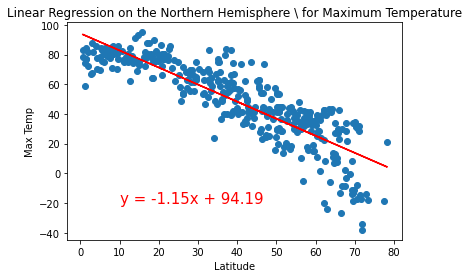

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,-20))

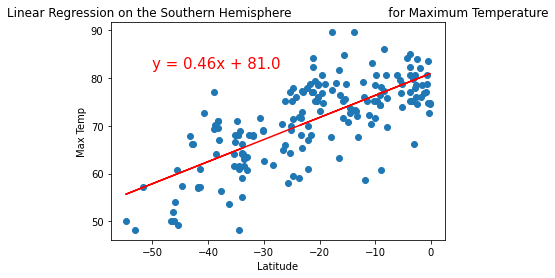

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,82))

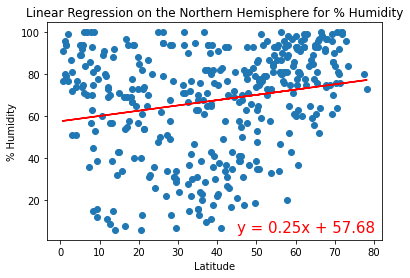

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,5))

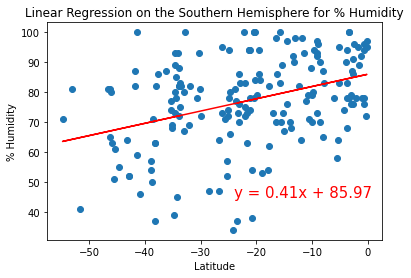

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-24,45))

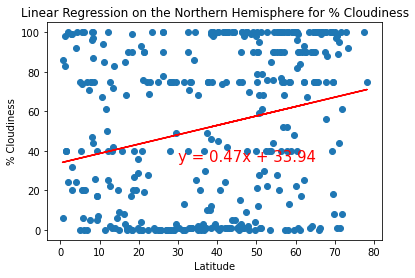

In [76]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(30,35))

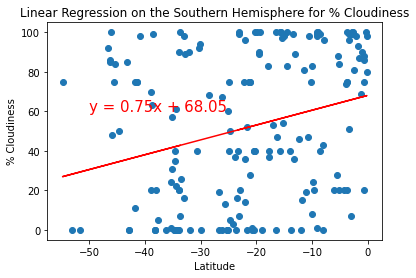

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

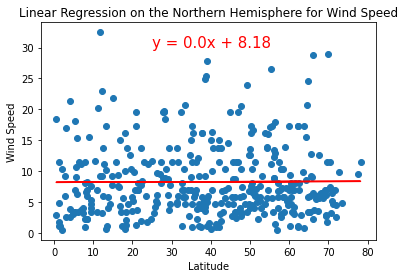

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(25,30))

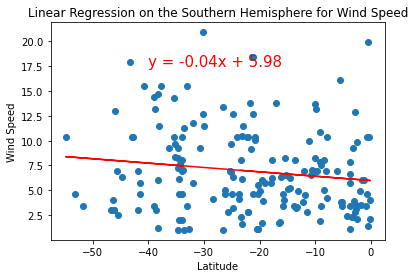

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-40,17.5))